In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
train_d = pd.read_csv('Train.csv')
test_d = pd.read_csv('Test.csv')

In [3]:
#Data exploration
train_d.shape,test_d.shape

((8523, 12), (5681, 11))

In [4]:
train_d.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test_d.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
#combining train and test dataset
train_d['src']='train'
test_d['src']='test'
tot_d = pd.concat([train_d,test_d],ignore_index=True)

In [7]:
train_d.shape,test_d.shape,tot_d.shape

((8523, 13), (5681, 12), (14204, 13))

In [8]:
tot_d['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [9]:
tot_d.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
src                             0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

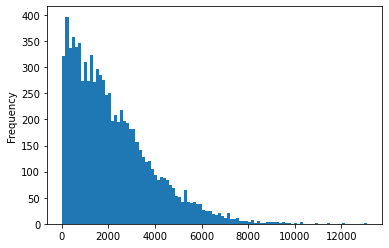

In [10]:
tot_d.Item_Outlet_Sales.plot(kind='hist',bins=100)

In [11]:
tot_d.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
tot_d.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
src                              2
dtype: int64

In [13]:
tot_d.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
src                           object
dtype: object

In [14]:
categorial_features = tot_d.select_dtypes(include=[np.object])
categorial_features.head(2)

Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier Outlet_Size  \
0           FDA15          Low Fat        Dairy            OUT049      Medium   
1           DRC01          Regular  Soft Drinks            OUT018      Medium   

  Outlet_Location_Type        Outlet_Type    src  
0               Tier 1  Supermarket Type1  train  
1               Tier 3  Supermarket Type2  train

In [15]:
numerical_features = tot_d.select_dtypes(include=[np.number])
numerical_features.head(2)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228

In [16]:
#frequency
for col in categorial_features:
    print('\n%s column: '%col)
    item_avg_weight = tot_d.pivot_table(values='Item_Weight', index='Item_Identifier')
    print(tot_d[col].value_counts())



Item_Identifier column: 
FDV21    10
FDO01    10
FDC22    10
DRK37    10
NCT18    10
         ..
NCW54     7
FDO33     7
FDM10     7
FDR51     7
FDH58     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548


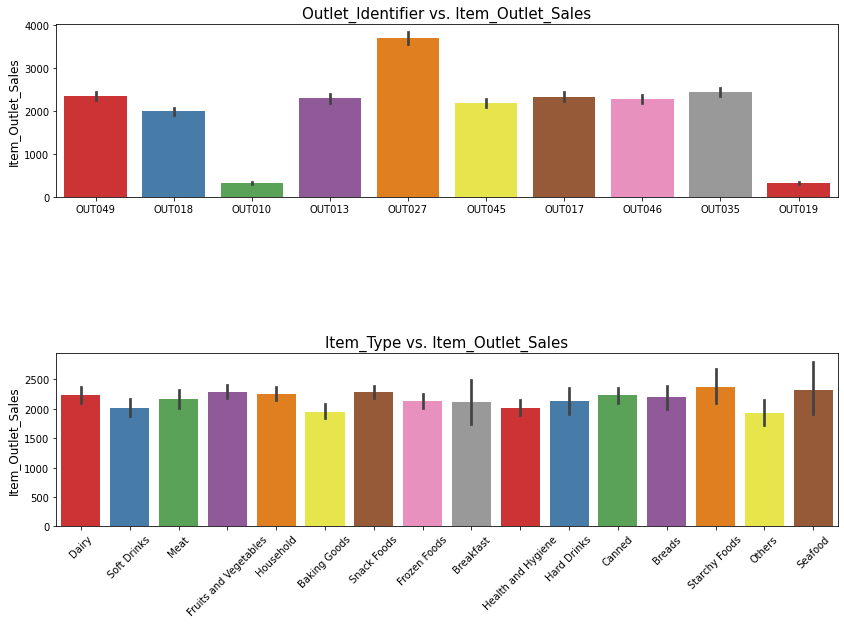

In [17]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sb.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=tot_d, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sb.barplot(x='Item_Type', y='Item_Outlet_Sales', data=tot_d, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)



plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

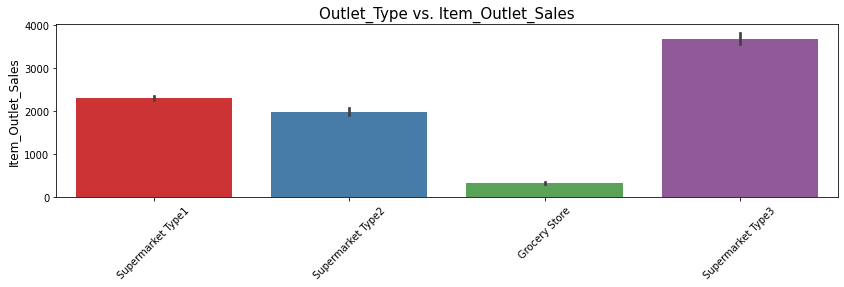

In [18]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sb.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=tot_d, palette="Set1")
ax.set_title("Outlet_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

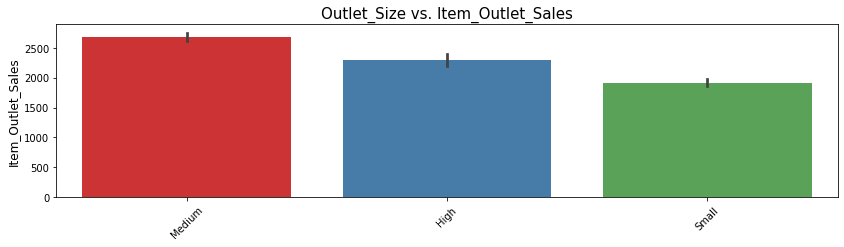

In [19]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sb.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=tot_d, palette="Set1")
ax.set_title("Outlet_Size vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

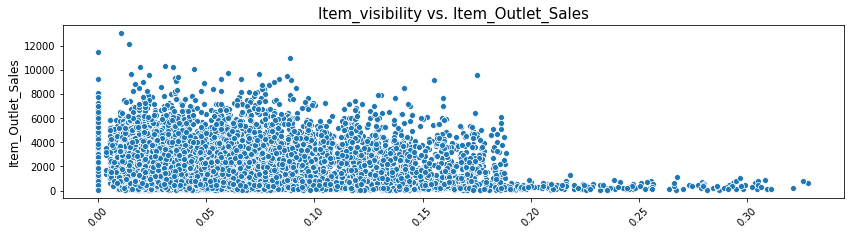

In [20]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sb.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=tot_d, palette="Set1")
ax.set_title("Item_visibility vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [21]:
#data cleaning
item_avg_weight = tot_d.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [22]:
missing_values = tot_d['Item_Weight'].isnull()

In [23]:
missing_values.sum()

2439

In [24]:
tot_d.loc[missing_values,'Item_Weight']  = tot_d.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])

In [25]:
tot_d['Item_Weight'].isnull().sum()
tot_d.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
src                             0
dtype: int64

In [26]:
from scipy.stats import mode

In [27]:
outlet_size_mode = tot_d.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [28]:
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [29]:
missing_values = tot_d['Outlet_Size'].isnull() 


In [30]:
print("Original missing: ")
missing_values.sum()

Original missing: 


4016

In [31]:
tot_d.loc[missing_values,'Outlet_Size'] = tot_d.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
tot_d['Outlet_Size'].isnull().sum()

0

In [32]:
#item_type combining
tot_d['Item_Type_Combined'] = tot_d['Item_Identifier'].apply(lambda x: x[0:2])
tot_d['Item_Type_Combined'] = tot_d['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
tot_d['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [33]:
#item_fat_content combining
print('Original Categories:')
tot_d['Item_Fat_Content'].value_counts()

Original Categories:


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

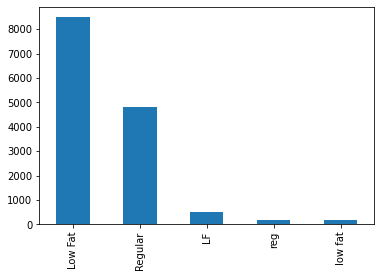

In [34]:
tot_d['Item_Fat_Content'].value_counts().plot(kind='bar')


In [35]:
print('\nModified Categories:')
tot_d['Item_Fat_Content'] = tot_d['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(tot_d['Item_Fat_Content'].value_counts())


Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


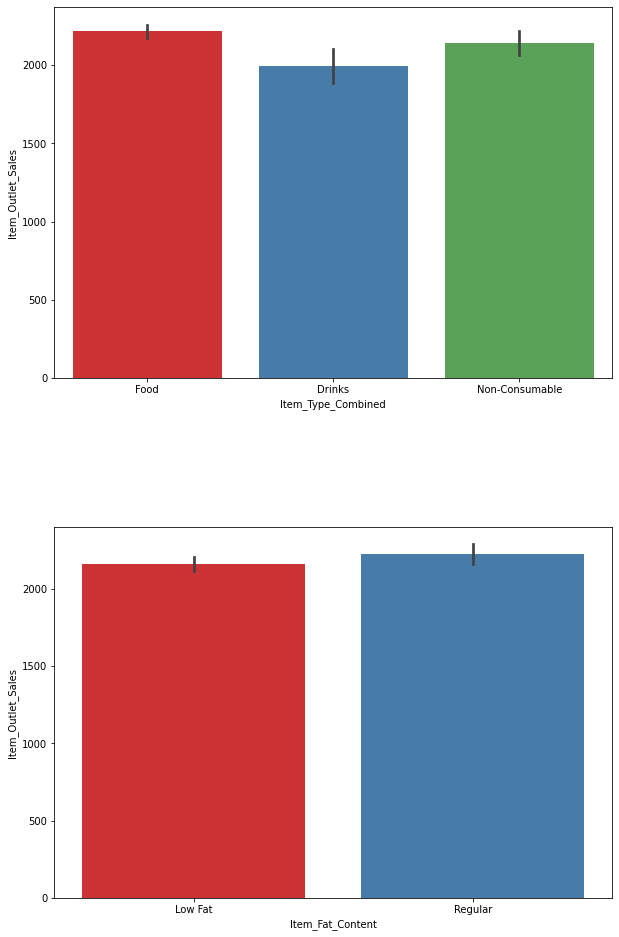

In [36]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sb.barplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=tot_d, palette="Set1")

plt.subplot(212)
sb.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=tot_d, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [37]:
tot_d.index = tot_d['Outlet_Establishment_Year']
tot_d.index

df = tot_d.loc[:,['Item_Outlet_Sales']]
df.head(2)


Item_Outlet_Sales
Outlet_Establishment_Year                   
1999                               3735.1380
2009                                443.4228

In [38]:
#active years
tot_d['Outlet_Years'] = 2013 - tot_d['Outlet_Establishment_Year']
tot_d['Outlet_Years']

Outlet_Establishment_Year
1999    14
2009     4
1999    14
1998    15
1987    26
        ..
1997    16
2009     4
2002    11
2007     6
2002    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [39]:
#non-consumable as non-edible
tot_d.loc[tot_d['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
tot_d['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [40]:
#all categorical values as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()


In [41]:
tot_d['Outlet'] = le.fit_transform(tot_d['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    tot_d[i] = le.fit_transform(tot_d[i])

In [42]:
#one-hot-coding
tot_d = pd.get_dummies(tot_d, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [43]:
tot_d.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
src                           object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [44]:
tot_d.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Item_Outlet_Sales            5681
src                             0
Outlet_Years                    0
Item_Fat_Content_0              0
Item_Fat_Content_1              0
Item_Fat_Content_2              0
Outlet_Location_Type_0          0
Outlet_Location_Type_1          0
Outlet_Location_Type_2          0
Outlet_Size_0                   0
Outlet_Size_1                   0
Outlet_Size_2                   0
Outlet_Type_0                   0
Outlet_Type_1                   0
Outlet_Type_2                   0
Outlet_Type_3                   0
Item_Type_Combined_0            0
Item_Type_Combined_1            0
Item_Type_Combined_2            0
Outlet_0                        0
Outlet_1                        0
Outlet_2                        0
Outlet_3      

In [45]:
tot_d.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [46]:
train = tot_d.loc[tot_d['src']=="train"]
test = tot_d.loc[tot_d['src']=="test"]

In [47]:
test.drop(['Item_Outlet_Sales','src'],axis=1,inplace=True)
train.drop(['src'],axis=1,inplace=True)

/home/vidya/.local/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
#export to files
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [49]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

In [50]:
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr

In [51]:
X=train[predictors]
y=train[target].values.reshape(-1,1)
X.shape,y.shape

((8523, 30), (8523, 1))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((7670, 30), (853, 30))

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("Accuracy: ",metrics.r2_score(y_train,model1.predict(X_train)))

Accuracy:  0.5632454768694288


In [55]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_train, model1.predict(X_train))))


RMSE :  1125.8787797368943


In [56]:
model2 = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("Accuracy of Decision Tree: ",metrics.r2_score(y_train,model2.predict(X_train)))

Accuracy of Decision Tree:  0.5818251932886749


In [57]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_train, model2.predict(X_train))))


RMSE :  1101.6708557352292


In [58]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)


/home/vidya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [59]:
y_pred3 = model3.predict(X_test)
print("Accuracy: ",metrics.r2_score(y_train,model3.predict(X_train)))

Accuracy:  0.9397462736555369


In [60]:
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("Accuracy: ",metrics.r2_score(y_train,model3.predict(X_train)))

/home/vidya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy:  0.9380611960099133


In [68]:
df = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': model3.predict(X_train).flatten()})
df.head(10)

Actual    Predicted
0   211.7244   259.908346
1  6608.0650  5874.226898
2  1761.7068  1874.240316
3  3068.0064  2675.510642
4  1197.7742  1481.618056
5   848.8950   829.919700
6  1607.2412  1581.488056
7  4042.7376  3523.220518
8  5591.3884  4120.303300
9  3994.8000  3568.548182

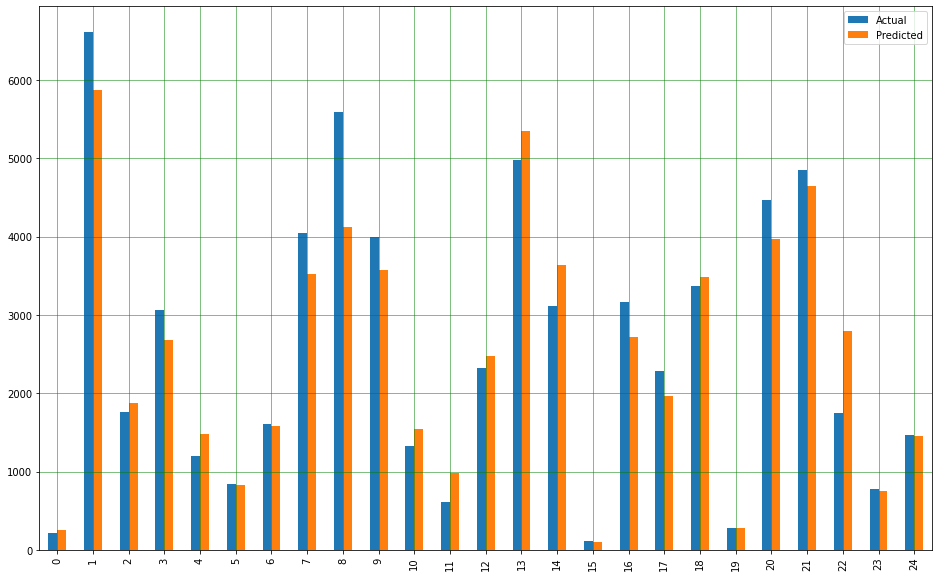

In [62]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [63]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,model3.predict(X_train))))

Root Mean Squared Error: 423.9887522632172


In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,model3.predict(X_train)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train,model3.predict(X_train)))

Mean Absolute Error: 294.7755897415906
Mean Squared Error: 179766.46204571973


In [65]:
pearsoncorr=train_d.corr(method='pearson')
pearsoncorr

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

<AxesSubplot:>

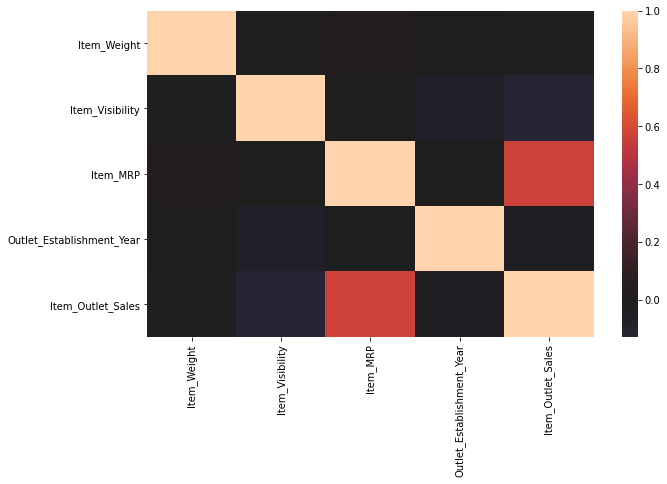

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
sb.heatmap(train_d.corr(), center=0)